# **InternLM 实战营第二期笔记Class3 作业**

## 基础作业

视频：https://www.bilibili.com/video/BV1QA4m1F7t4/

教程：https://github.com/InternLM/Tutorial/blob/camp2/huixiangdou/readme.md

作业：https://github.com/InternLM/Tutorial/blob/camp2/huixiangdou/homework.md

github地址：https://github.com/InternLM/HuixiangDou


### 1. 在茴香豆 Web 版中创建自己领域的知识问答助手

- 参考视频零编程玩转大模型，学习茴香豆部署群聊助手
- 完成不少于 400 字的笔记 + 线上茴香豆助手对话截图(不少于5轮)
- （可选）参考 代码 在自己的服务器部署茴香豆 Web 版

---------------------------------------------作业回答---------------------------------------------

RAG（Retrieval Augmented Generation）技术，通过检索与用户输入相关的信息片段，并结合外部知识库来生成更准确、更丰富的回答。

解决 LLMs 在处理知识密集型任务时可能遇到的挑战, 如幻觉、知识过时和缺乏透明、可追溯的推理过程等。提供更准确的回答、降低推理成本、实现外部记忆。

RAG 能够让基础模型实现非参数知识更新，无需训练就可以掌握新领域的知识。在这里我们使用InternLM的茴香豆来实现RAG技术，搭建自己的知识领域助手。

茴香豆是一个基于 LLM 的群聊知识助手，其具有以下优势：

1. 设计拒答、响应两阶段 pipeline 应对群聊场景，解答问题同时不会消息泛滥。精髓见技术报告
2. 成本低至 1.5G 显存，无需训练适用各行业
3. 提供一整套前后端 web、android、算法源码，工业级开源可商用

目前，已经应用于微信客户端，回复用户问题、解释软件和硬件术语并假装是人类等应用

相关链接：

1. InternLM2课件：https://github.com/InternLM/HuixiangDou/blob/main/README_zh.md

2. 茴香豆Github：https://github.com/InternLM/Tutorial/blob/camp2/huixiangdou/readme.md#11-%E9%85%8D%E7%BD%AE%E5%9F%BA%E7%A1%80%E7%8E%AF%E5%A2%83

### 在茴香豆Web端创建知识问答助手，回答不少于5轮对话

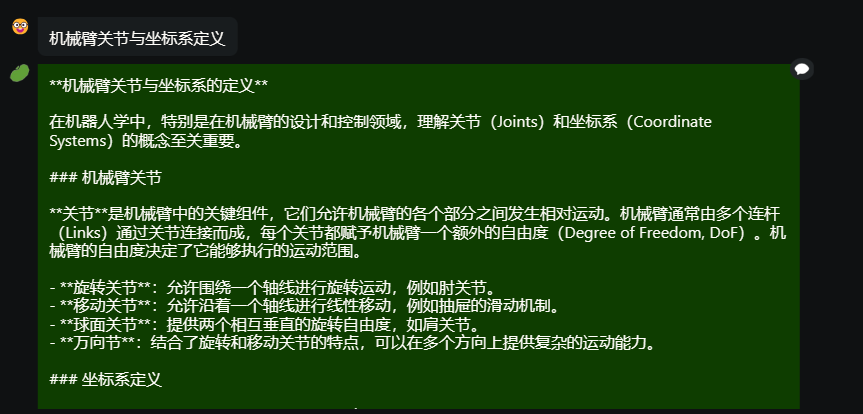

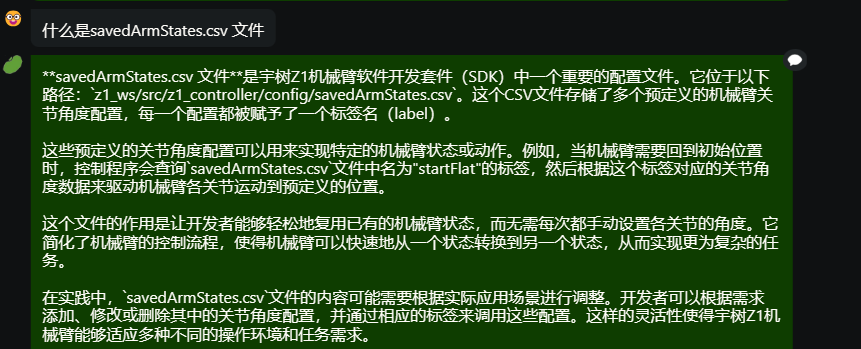

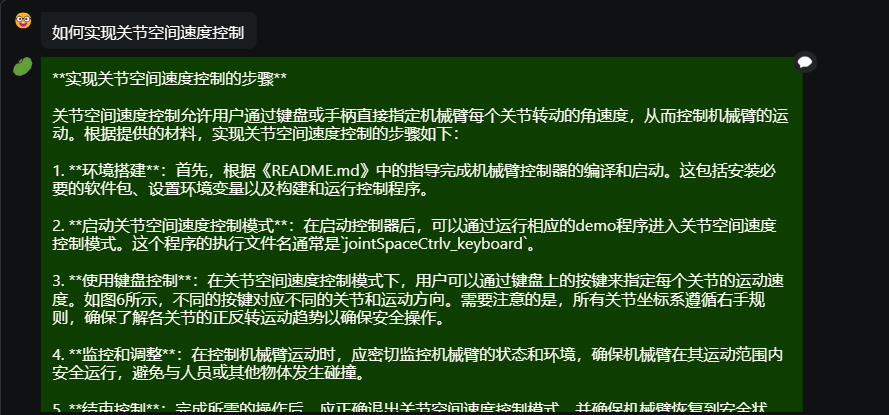

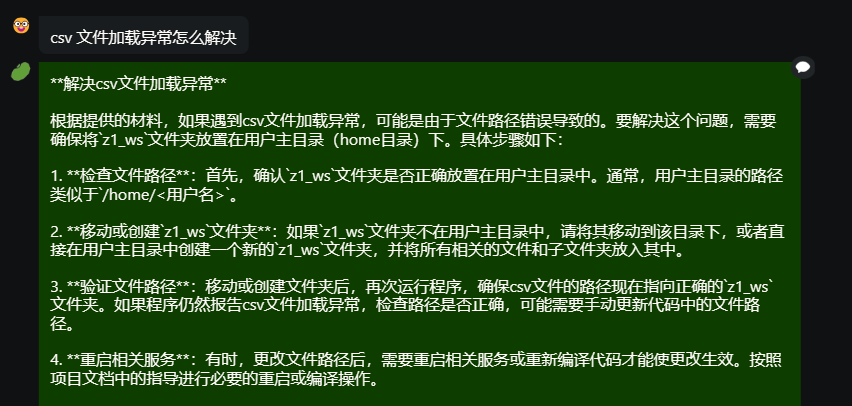

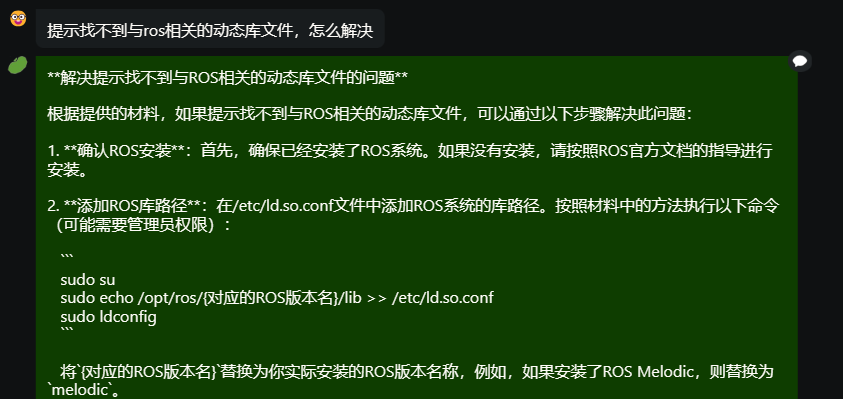

## 2.在 InternLM Studio 上部署茴香豆技术助手

根据教程文档搭建 茴香豆技术助手，针对问题"茴香豆怎么部署到微信群？"进行提问

完成不少于 400 字的笔记 + 截图

---------------------------------------------作业回答---------------------------------------------

修改用于向量数据库和词嵌入的模型`bce-embedding-base_v1`

用于检索的重排序模型`bce-reranker-base_v1`

和本次选用的大模型`internlm2-chat-7b`


其中
`BCEmbedding`是由网易有道开发的中英双语和跨语种语义表征算法模型库，其中包含 `EmbeddingModel`和 `RerankerModel`两类基础模型。

- EmbeddingModel专门用于生成语义向量，在语义搜索和问答中起着关键作用

- RerankerModel擅长优化语义搜索结果和语义相关顺序精排

**BCEmbedding以其出色的双语和跨语种能力而著称，在语义检索中消除中英语言之间的差异**

Github地址：https://github.com/netease-youdao/BCEmbedding/blob/master/README_zh.md

环境配置与使用茴香豆搭建 RAG 助手链接：
https://github.com/InternLM/Tutorial/blob/camp2/huixiangdou/readme.md

茴香豆Github链接：
https://github.com/InternLM/HuixiangDou

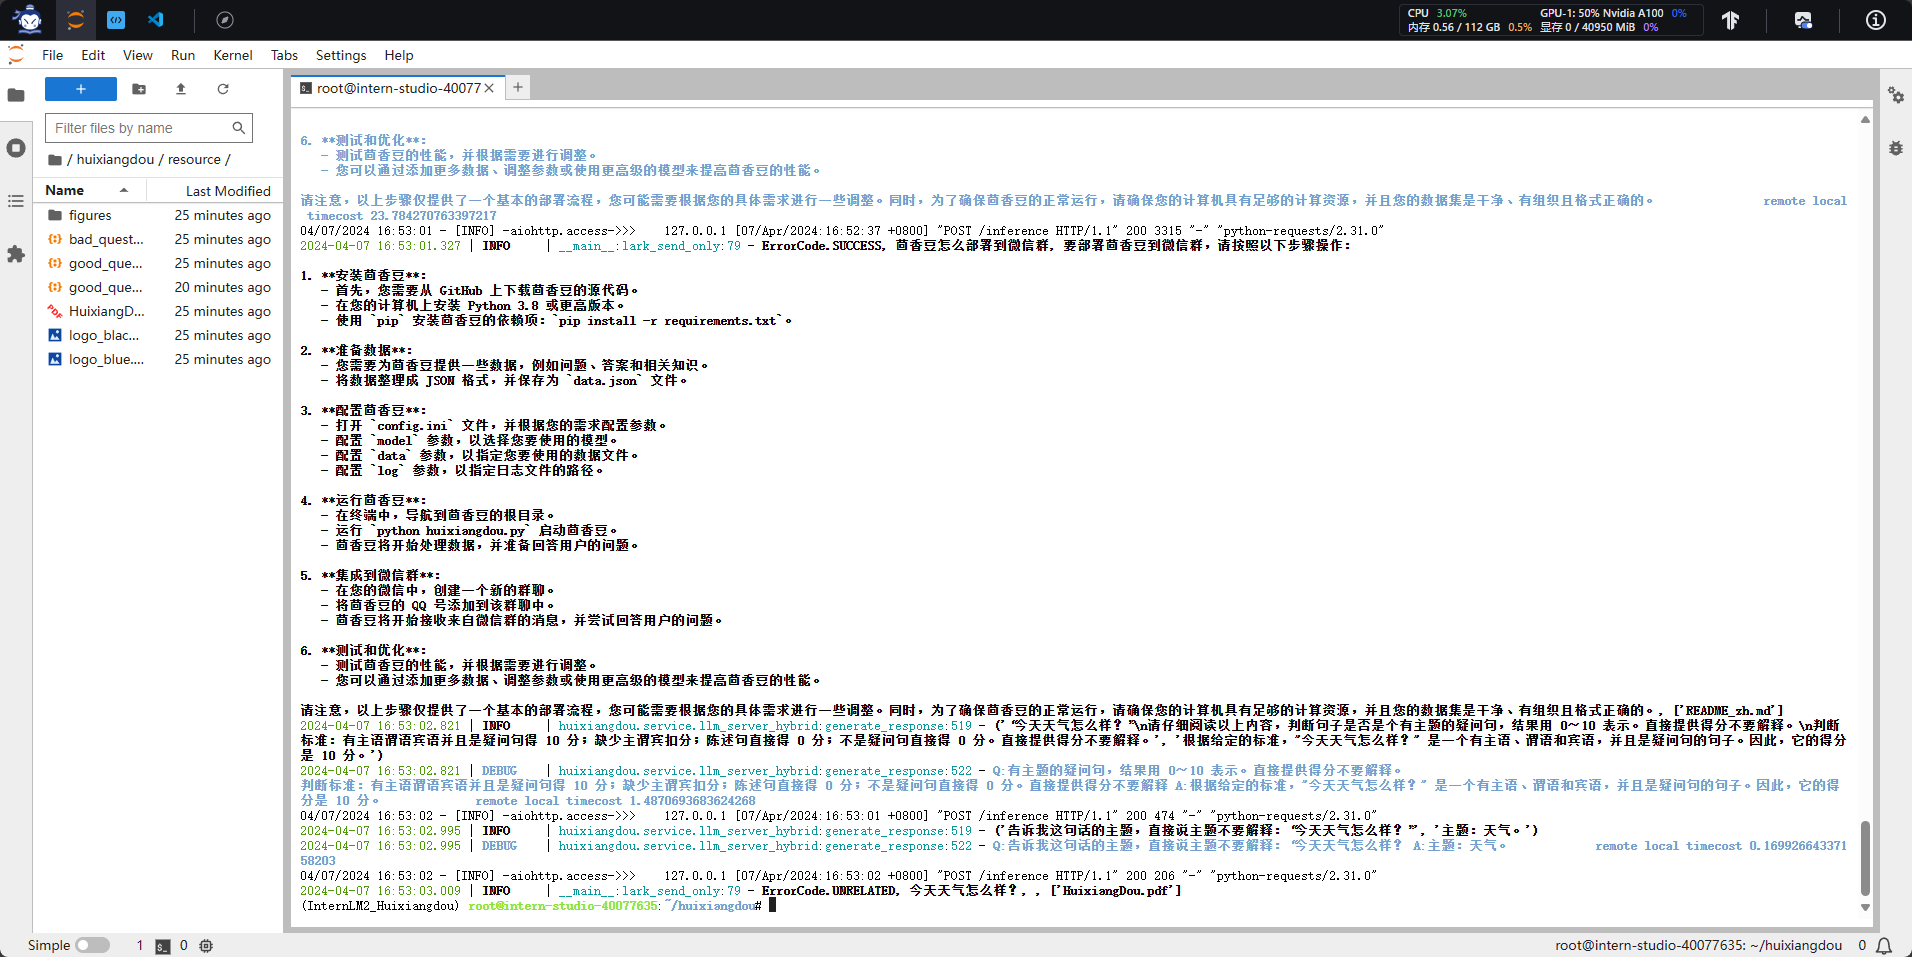

## 进阶作业 - 二选一

A.【应用方向】 结合自己擅长的领域知识（游戏、法律、电子等）、专业背景，搭建个人工作助手或者垂直领域问答助手，参考茴香豆官方文档，部署到下列任一平台。
- 飞书、微信

- **<font color = red>√ 可以使用 茴香豆 Web 版 或 InternLM Studio 云端服务器部署</font>**
- 涵盖部署全过程的作业报告和个人助手问答截图

### Step1：新增知识库

由宇树科技和增广智能的使用与开发手册构成的pdf文件，作为知识库。

<img src="./img/add.png" width="40%">

<img src="./img/add_pdf.png" width="40%">

```bash
cd /root/huixiangdou
mv resource/good_questions.json resource/good_questions_bk.json
echo '[
    "什么是机械臂有限状态机",
    "怎么实现机械臂的关节空间速度控制",
    "怎么实现机械臂笛卡尔空间速度控制",
    "csv文件加载异常怎么处理",
    "什么是宇树机械臂",
    "提示找不到与ros相关的动态库文件怎么办",
    "RM电缸的在安装时有哪些注意事项"
]' > /root/huixiangdou/resource/good_questions.json
```
新建测试问询列表，用来测试拒答流程是否起效

```bash
cd /root/huixiangdou
echo '[
"怎么实现机械臂的关节空间速度控制",
"你好，介绍下自己"
]' > ./test_queries.json
```

> 创建向量数据库存储目录
```bash
cd /root/huixiangdou && mkdir workdir 
```
> 分别向量化知识语料、接受问题和拒绝问题中后保存到 workdir

```bash
python3 -m huixiangdou.service.feature_store --sample ./test_queries.json
```

> 填入问题
```bash
sed -i '74s/.*/    queries = ["我怎么实现机械臂笛卡尔空间速度控制", "茴香豆怎么部署到微信群", "今天天气怎么样？"]/' /root/huixiangdou/huixiangdou/main.py
```
> 运行茴香豆

```bash
cd /root/huixiangdou/
python3 -m huixiangdou.main --standalone
```

<img src="./img/class301.png" width="60%">

![](img/img-20240412103349.png)

![](img/img-20240412103437.png)

![](img/img-20240412103630.png)